# Tarea Examen 2
### Ejercicio 1

## Jonathan Alexis Urrutia Anguiano 414011025

In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

from JSAnimation import IPython_display
from matplotlib import animation

Supongamos uns sitema con un partícula moviéndose sobre una circunferencia de radio $R$. Entonces la velocidad es $\dot{\vec{r}} = r {\dot\theta}\hat{e}_\theta$ y el momento angular es
$$
\vec{L} = r\hat{e}_r \times m\dot{\vec{r}} = \hat{e}_z R^2m\dot{\theta},\\
\Rightarrow \dot{\theta} = \frac{L}{mR^2},
$$
Por este resultado la energía del sistema es
$$E=  \frac{p^2}{2m} = \frac{m^2r^2 {\dot\theta}^2}{2m} = \frac{L^2}{2mR^2},$$
El sistema se perturba cada tiempo $\tau$ con un afuerza en la misma dirección, sentido y magnitud $\epsilon$. Esta fuerza cambia el momento lineal y el angular de forma instantenea. En el momento en el que la fuerza anterior actúa sobre la masa, el cambio en la cantidad de movimiento es $\Delta p = \epsilon \cos\theta$.

Como $\Delta p = p_{i+1}- p_{i} \Rightarrow p_{i+1} = p_i + \Delta p$. Por lo que
$$ p_{i+1} = p_i + \epsilon \cos\theta$$.
Ya que $\theta = \theta_0 + \dot\theta t$ sabemos que $\Delta \theta = \dot\theta \Delta t$, pero $\Delta t = \tau$. Por otro lado, $\Delta \theta = \theta_i - \theta_{i+1}$, entonces

\begin{align}
\theta_{i+1} &= \theta_i + \Delta \theta\\
            &= \theta_i + \dot{\theta} \Delta t\\
            &=  \theta_i + \dot{\theta}\tau\\
            &= \theta_i + \frac{L_{i+1}}{mR^2}\tau\\
\end{align}

b) Con $\epsilon =0$ usar 200 condiciones iniciales tales que $p_0$ pertenezca a $[-\pi/2,\pi/2]$ y $\theta$ a $[0,2\pi]$. y encontrar las curvas en el plano ($\theta,p)$ que resultan de muchas iteraciones. Explicar

Hacemos un programa para que cree las condiciones iniciales aleatorias entre los intervalos pedidos.

In [2]:
def cond_ini():
    theta_0 = 2*pi*rand()
    p_0 = (.5-rand())*pi
    return array([theta_0,p_0])

Hacemos un programa para el mapeo:

In [3]:
def mapeo_per(theta_p, tau, epsilon):  #Mapeo cuando se perturba el sistema
    theta_0, p_0 = theta_p[0], theta_p[1]
    
    p_1 = p_0 + epsilon*cos(theta_0)
    theta_1 = theta_0 + p_1 * tau
    return array([theta_1,p_1])

def graficas(AX, t,tau,epsilon):
    for i in xrange(200):
        sol = zeros([len(t),2])
        sol[0] = cond_ini()
    
        for j in xrange(len(t)-1):
            sol[j+1] = mapeo_per(sol[j],tau, epsilon)
            sol[j+1][0] = sol[j+1][0] % (2*pi)
        AX.set_title(r"$\theta$ vs. $p$ con $\epsilon = %s$" %(str(epsilon)),fontsize = 30)
        AX.set_xlabel(r'$\theta$',fontsize = 20), AX.set_ylabel(r'$p$',fontsize = 20), AX.grid(True)
        AX.set_xlim(0,2*pi),AX.set_ylim(-pi/2,pi/2)
        AX.plot(sol[:,0],sol[:,1],'.',markersize = 1)

Las ecuaciones de movimiento son muy sencillas, ya que la evolución en el tiempo de $\theta$ y p corresponden respectivamente a una evolución a omega constante y p constante, cuando la perturbación no está prendida, y a una evolución descrita por las expresiones de a) cuando prendemos la perturbación.

Resolvemos ahora la evolución del sistema para 200 condiciones iniciales aleatorias.

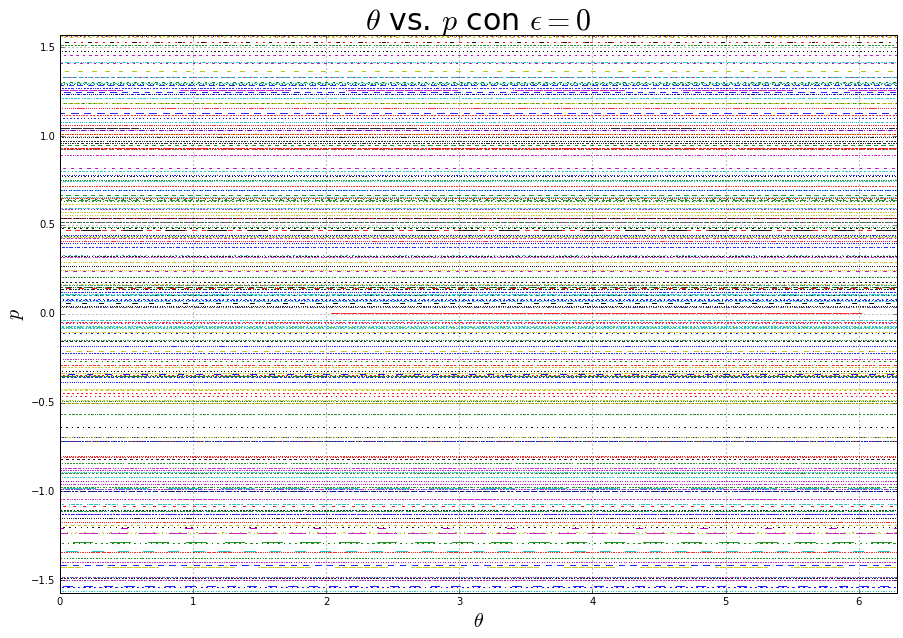

In [4]:
fig = figure(figsize=(15,10))
ax = fig.add_subplot(111)
tau = 2
epsilon =0
t = arange(0,50,.1)

graficas(ax,t,tau,epsilon)

show()

Para que los puntos sean fijos, es necesario que $\theta_{i+1} = \theta_i$ y que $p_{i+1} = p_i$. De las ecuaciones anteriores, para que esto sea cierto, es necesario que se cumplea $\cos\theta = 0$, suponiendo que $\epsilon$ no es nulo. Entonces, los puntos estacionarios estáne en
$$\theta = \frac{\pi}{2}, \frac{3 \pi}{2}$$

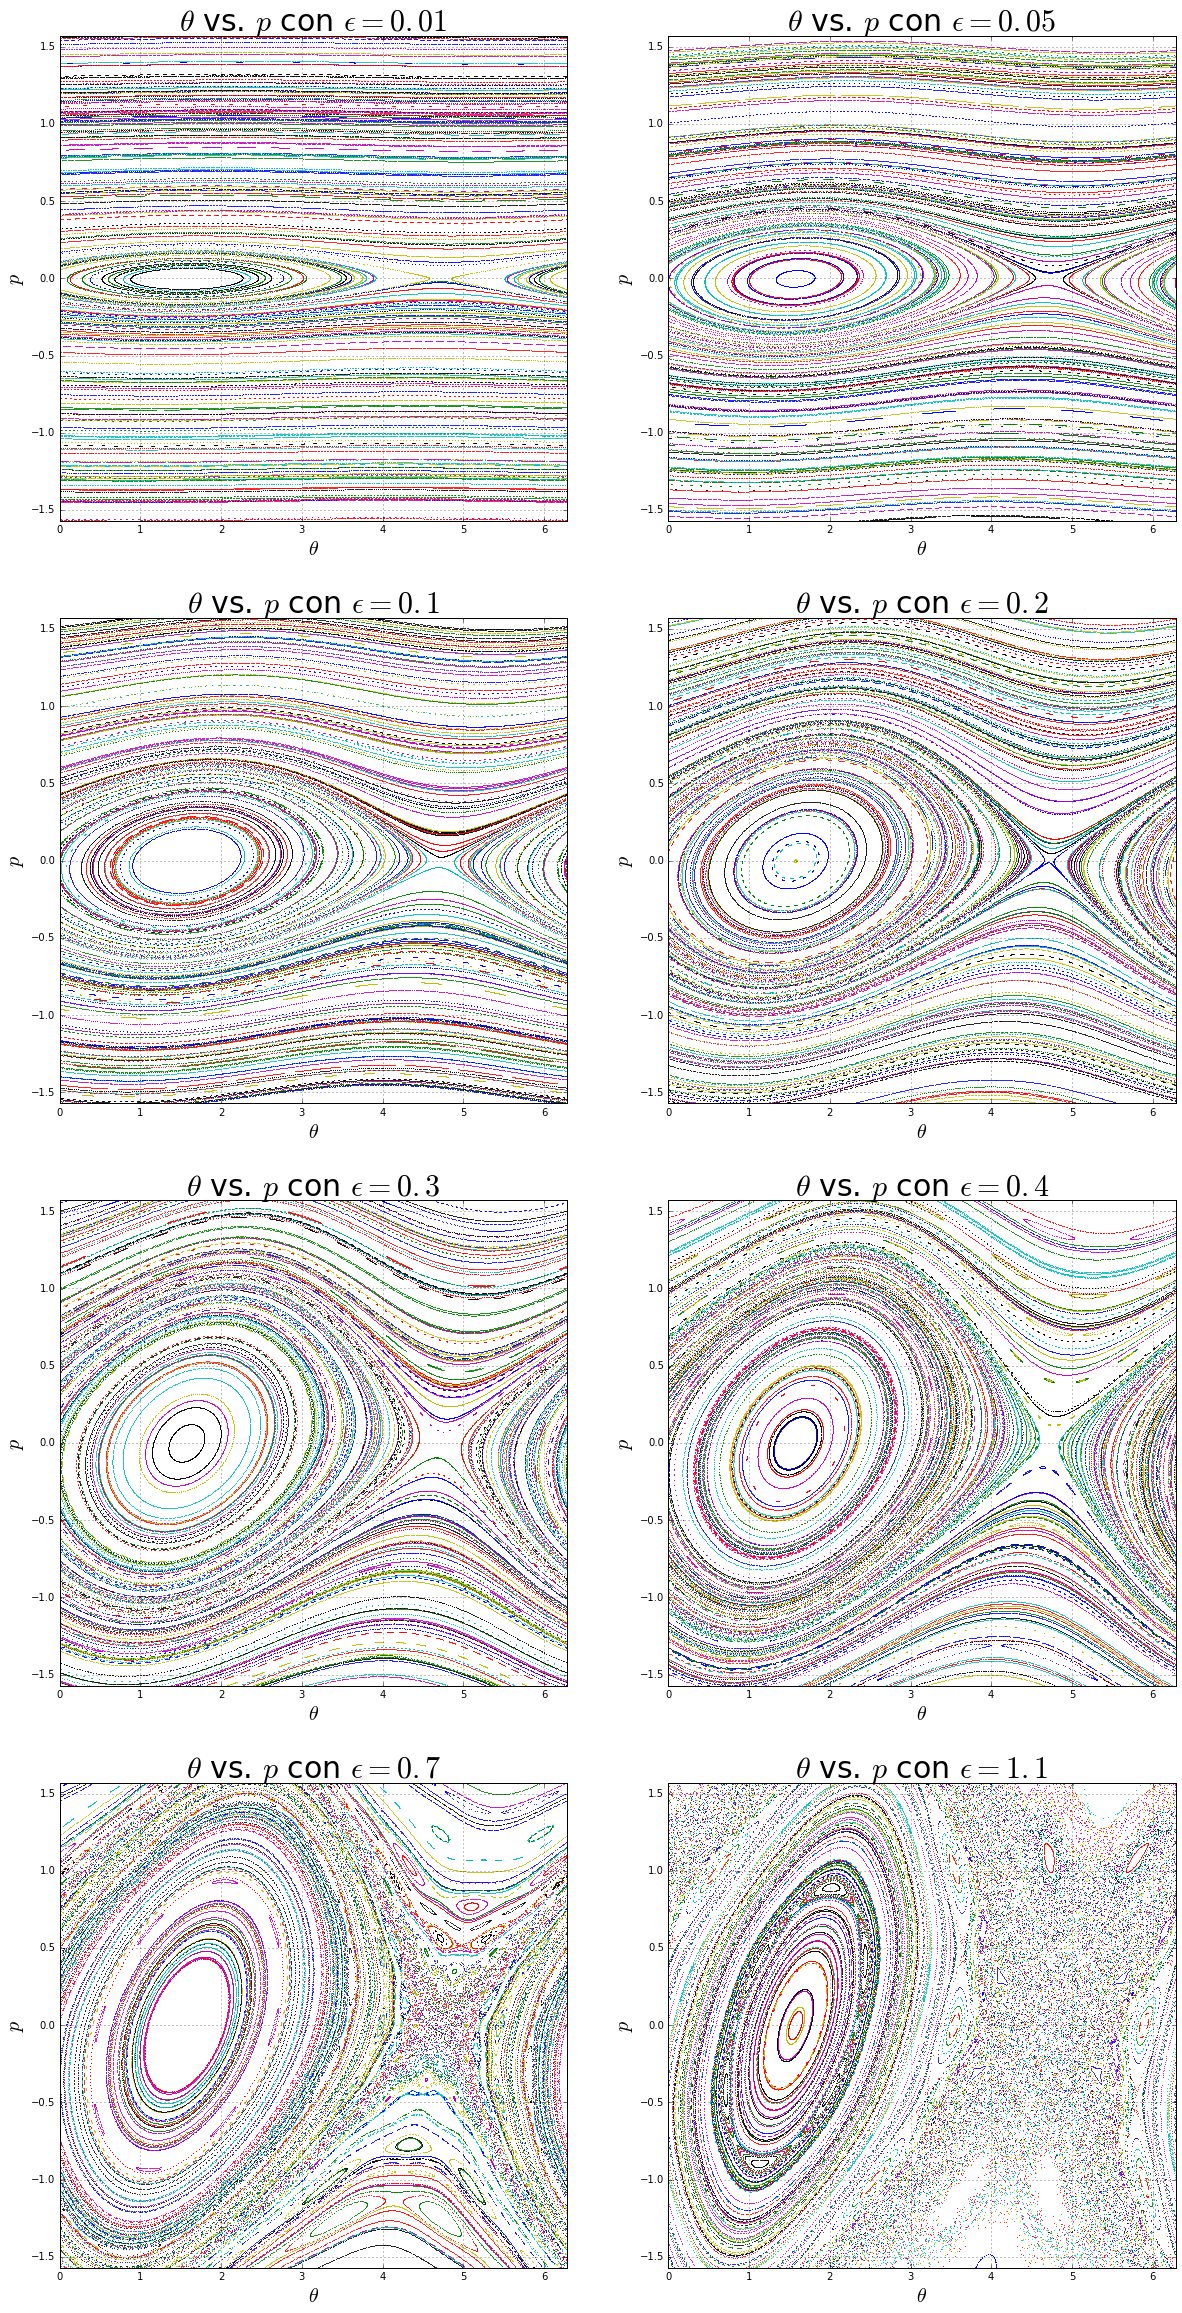

In [5]:
epsilon = array([0.01,0.05,0.1,0.2,0.3,0.4,0.7, 1.1])
tau = 1
t = arange(0,50,.1)

fig, ax = plt.subplots(4,2,figsize=(20, 40))
for i in xrange(4):
    for j in xrange(2):
        graficas(ax[i,j],t,tau,epsilon[j+2*i])
show()

In [6]:
epsilon = arange(0,4.05,.05)

figura = figure() #Crea la figura
ejes = axes(xlim=(0,pi*2),ylim=(-pi/2,pi/2))

trayectoria, = ejes.plot([],[],lw=2)
punto, = ejes.plot([],[],'o')

def init():
    trayectoria.set_data([],[])
    punto.set_data([],[])
    return trayectoria, punto,  #Inicializa variables

def el_movimiento(i):
    y,v = sol[:,0],sol[:,1]
    trayectoria.set_data(y[:i+1],v[:i+1])
    graficas(ax[i],t,tau,epsilon[i])
    return trayectoria,punto
    
animation.FuncAnimation(figura,el_movimiento, init_func = init , frames =len(epsilon)) # los argumentos son el entorno, lo que va a animar la función borron y cuenta nueva

NameError: global name 'sol' is not defined